In [7]:
## First of all we start setting up our working environment, for this projects we will be using PANDAS, Matplotlib and Seaborn


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")


Setup Complete


In [13]:
## OK, let us just import the data and check the what the whole stuff is about

In [14]:
data_filepath = "reed_uk.csv"
data=pd.read_csv(data_filepath)
data

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,uk,reed,Apply now New opportunity not to be missed! H...,NaN,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon
1,law jobs,Swindon,Reed,uk,reed,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,uk,reed,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,uk,reed,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,uk,reed,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,science jobs,Oxfordshire,Hays Specialist Recruitment Limited,uk,reed,Apply now Scientist - Cell Based Assays - Neu...,NaN,Scientist In vitro Cell-Free & Cell Based Assays,"Contract, full-time",3/7/2018,£22.00 - £26.00 per hour,South East England
49996,graduate training internships jobs,Northampton,The Graduate,uk,reed,Apply now Our client is looking for high achi...,Required skills Blue Chip Communication Skill...,Graduate Training Scheme - Recruitment,"Permanent, full-time",3/9/2018,"£18,000 - £21,000 per annum",Northamptonshire
49997,strategy consultancy jobs,City of London,Capgemini Consulting,uk,reed,Apply on employer's website Who youâ€™ll be w...,NaN,"Management Consultant - Retail Buying, Merchan...","Permanent, full-time",2/17/2018,Competitive salary,London
49998,purchasing jobs,Egham,Concept Human Solutions,uk,reed,"Apply now UNDERSTANDING, SERVICE, TRUST3 Word...",Required skills Procurement AV,AV Procurement Assistant,"Permanent, full-time",3/6/2018,"£27,500 - £30,000 per annum, negotiable, OTE",Surrey


In [51]:
## PART ONE: FEATURE ENGINEERING

In [52]:
## Let us explore out jobs dataset 

In [57]:
data.describe()

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
count,50000,50000,50000,50000,50000,50000,20548,50000,50000,50000,50000,49980
unique,37,2918,5166,1,1,42057,14887,29155,9,66,7345,167
top,health jobs,London,Hays Specialist Recruitment Limited,uk,reed,Apply on employer's website Add an annual tur...,Required skills Recruitment,Administrator,"Permanent, full-time",3/7/2018,Salary negotiable,London
freq,1930,4349,1830,50000,50000,85,123,162,36864,8472,4539,5900


In [60]:
## Our Dataset only contains data from Jobs in the UK
##From the describe statement we can conclude:
##Geo and city collumns have no different values


In [ ]:
##let us check for missing values

<AxesSubplot:>

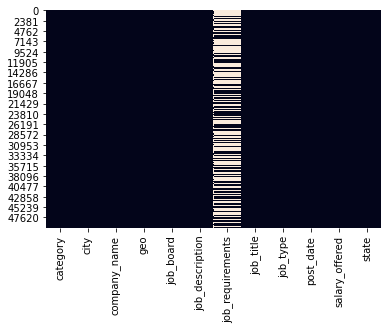

In [44]:
sns.heatmap(data.isnull(), cbar=False)


In [45]:
## We see that the job_requirements collumn has missing values. Before deciding how to proceed let´s check what´s the percentage of missing values

In [49]:
percent_missing = data['job_requirements'].isnull().sum() * 100 / len(data)

percent_missing 

58.904

In [ ]:
## Around 60% of the job requirements column is missing, so we can consider dropping it as well as the data without missing values

In [62]:
del data['job_requirements']
del data['job_board']
del data['geo']


In [63]:
data.head()

,category,city,company_name,job_description,job_title,job_type,post_date,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,Apply now New opportunity not to be missed! H...,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon
1,law jobs,Swindon,Reed,Apply now This role requires an experienced s...,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,Apply now Job Title: Warehouse personLocation...,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,Apply now Castles Solicitors are looking for ...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,Apply now International Pharmaceutical Manufa...,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England
